# Imports

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Initialization

In [9]:
data_path = r"D:\Stress Detection and Prediction using ANN\Dataset\Human Stress Dataset Preprocessed.csv"
dataset = pd.read_csv(data_path)

# Split Features and Target
X = dataset.drop(columns=['Stress Levels'])  # Features
y = dataset['Stress Levels']                # Target

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [10]:
# Define ANN Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer + 1st Hidden Layer
    Dropout(0.2),  # Dropout Regularization
    Dense(8, activation='relu'),  # 2nd Hidden Layer
    Dense(1, activation='sigmoid')  # Output Layer for Binary Classification
])

# Compile Model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50,  # Number of Epochs
                    batch_size=16,  # Batch Size
                    verbose=1)

Epoch 1/50


d:\Stress Detection and Prediction using ANN\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4248 - loss: 0.7163 - val_accuracy: 0.7778 - val_loss: 0.6376
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8344 - loss: 0.6175 - val_accuracy: 0.9603 - val_loss: 0.5600
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9390 - loss: 0.5514 - val_accuracy: 1.0000 - val_loss: 0.4504
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9770 - loss: 0.4390 - val_accuracy: 1.0000 - val_loss: 0.3438
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9859 - loss: 0.3300 - val_accuracy: 1.0000 - val_loss: 0.2606
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9836 - loss: 0.2735 - val_accuracy: 1.0000 - val_loss: 0.1879
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9919 - loss: 0.1929 - val_accuracy: 1.0000 - val_loss: 0.1369
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9782 - loss: 0.1574 - val_accuracy: 1.0000 - val_loss: 0.1035
Epo

- Sequential : It's a way to stack layers in your neural network one after the other.
- `Dense(16, activation='relu', input_shape=(X_train.shape[1],))` :
    - Dense: Fully connected layer where every neuron is connected to all neurons in the previous layer.
    - 16: Number of neurons in the first hidden layer. More neurons capture more patterns but can lead to overfitting.
    - activation='relu': Rectified Linear Unit (ReLU) activation function introduces non-linearity to the model, enabling it to learn complex patterns.
    $ ReLU(x) = max(0,x) $ \
    Any negative value is converted to zero, ensuring faster and efficient learning.
    - input_shape=(X_train.shape[1],): Specifies the input size, i.e., the number of features in your dataset.

- `Dropout(0.2)` :
    Regularization technique to prevent overfitting by randomly "dropping" 20% of neurons during each training step. This forces the model to not rely too heavily on specific neurons.

- `Dense(8, activation='relu')` :
    Second hidden layer with 8 neurons. Adding layers lets the model capture more abstract patterns.

- `Dense(1, activation='sigmoid')` :
    - Output layer with 1 neuron since this is a binary classification task.
    - sigmoid: Produces a value between 0 and 1, representing the probability of the "Stressed" class.

*   **`optimizer='adam'`**:
    *   Adam (Adaptive Moment Estimation) optimizer adjusts the learning rate dynamically for faster and more efficient training. It combines two techniques: momentum and RMSProp.

*   **`loss='binary_crossentropy'`**:
    *   The loss function measures how far off the model's predictions are from the actual values.
    *   **Binary Cross-Entropy** is used for binary classification tasks. It calculates the error as:
      $ \text{Loss} = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right) $
      * $ y_i: \text{Actual class (0 or 1).} $
      * $ \hat{y}_i : \text{Predicted probability for the positive class (Stressed).} $

*   **`metrics=['accuracy']`**:
    *   Accuracy is used to evaluate the percentage of correct predictions.


# Evaluation

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 9.0035e-04
Test Loss: 0.0009, Test Accuracy: 1.0000


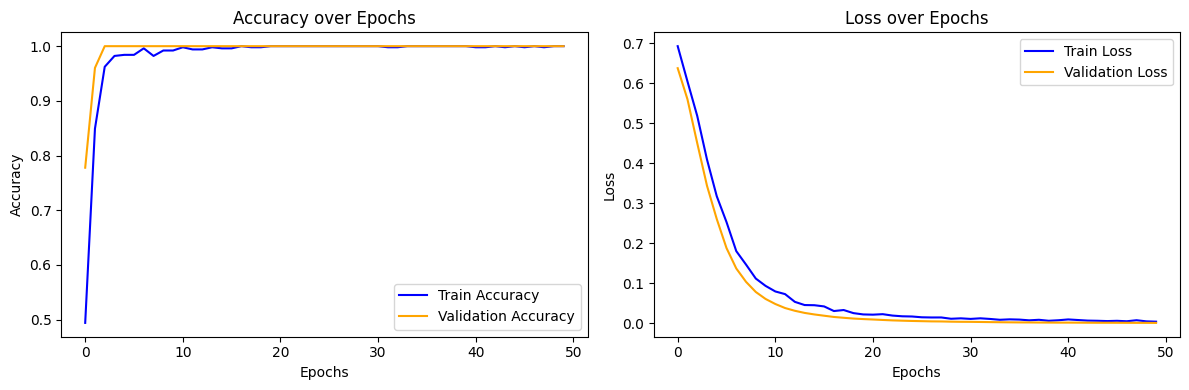

In [11]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Plot Training History
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Prediction and Report

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        79

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



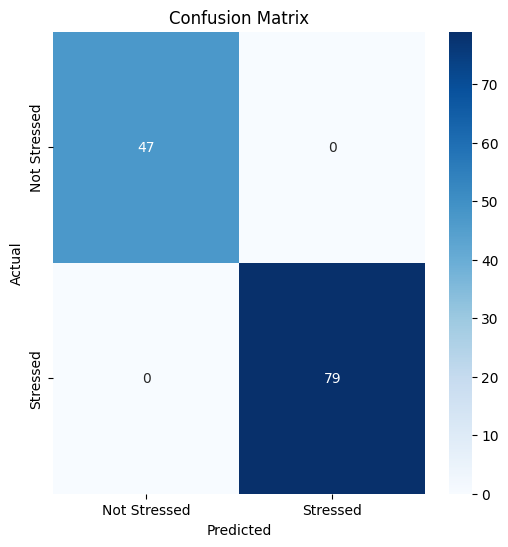

In [12]:
# Predict on Test Set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Stressed', 'Stressed'], yticklabels=['Not Stressed', 'Stressed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


`classification_report(y_test, y_pred)`:

*   Compares the actual test labels (`y_test`) with the predicted labels (`y_pred`) to calculate:

    *   **Precision**: The proportion of predicted positives that are correct.
        $ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $

    *   **Recall**: The proportion of actual positives that are correctly predicted.
        $ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $

    *   **F1-Score**: The harmonic mean of precision and recall.
        $ F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $

    *   **Accuracy**: The percentage of correct predictions out of total predictions.



- The confusion matrix shows that there were no Type 1 or Type 2 errors.

# Save the model

In [14]:
# Save the model in the native Keras format
model.save('stress_detection_model.keras')